# Mức tiêu hao nhiên liệu

## 1.ĐỌC DỮ LIỆU

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('mpg.csv')
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


## 2. TÌM HIỂU DỮ LIỆU

In [3]:
df.shape

(398, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
# Xem các đại lượng thống kê
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [6]:
# Kiểm tra các giá trị phân biệt
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [7]:
# Kiểm tra có dòng nào không có dữ liệu?
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [8]:
# Xóa các dòng không có dữ liệu
df.dropna(inplace=True)

In [9]:
df.shape

(392, 9)

In [10]:
print('- cylinders: trung bình: {}, trung vị: {}'.format(df['cylinders'].mean(), df['cylinders'].median()))
print('- horsepower: trung bình: {}, trung vị: {}'.format(df['horsepower'].mean(), df['horsepower'].median()))
print('- weight: trung bình: {}, trung vị: {}'.format(df['weight'].mean(), df['weight'].median()))

- cylinders: trung bình: 5.471938775510204, trung vị: 4.0
- horsepower: trung bình: 104.46938775510205, trung vị: 93.5
- weight: trung bình: 2977.5841836734694, trung vị: 2803.5


In [11]:
# Phân vị 25%
df['mpg'].quantile(0.25)

17.0

In [12]:
print('- mpg, miền giá trị: ', df['mpg'].max() - df['cylinders'].min())
print('- mpg, miền phân vị: ', df['mpg'].quantile(0.75) - df['cylinders'].quantile(0.25))

- mpg, miền giá trị:  43.6
- mpg, miền phân vị:  25.0


## 3. SO SÁNH MỨC TIÊU HAO NHIÊN LIỆU TRUNG BÌNH CỦA CÁC DÒNG XE

In [13]:
# df.groupby('origin').count()
mpg_origin = df[['mpg', 'origin']].groupby('origin').mean().reset_index()
mpg_origin

,origin,mpg
0,europe,27.602941
1,japan,30.450633
2,usa,20.033469


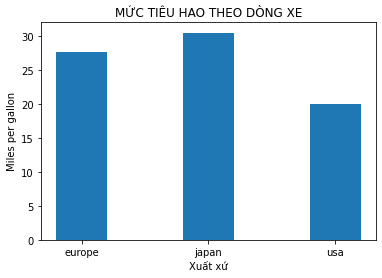

In [14]:
# Vẽ bằng bar chart
plt.bar(mpg_origin['origin'], mpg_origin['mpg'], width=0.4)

plt.xlabel('Xuất xứ')
plt.ylabel('Miles per gallon')
plt.title('MỨC TIÊU HAO THEO DÒNG XE')
plt.show()

In [15]:
# Sort dữ liệu theo mpg
mpg_origin.sort_values(by='mpg', inplace=True)
mpg_origin

,origin,mpg
2,usa,20.033469
0,europe,27.602941
1,japan,30.450633


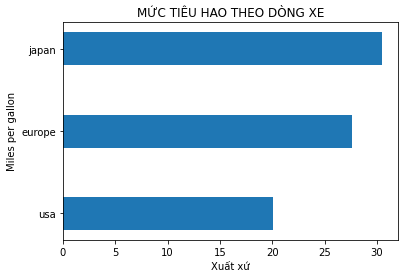

In [16]:
# Vẽ bằng bar chart nằm ngang

plt.barh(mpg_origin['origin'], mpg_origin['mpg'], height=0.4)

plt.xlabel('Xuất xứ')
plt.ylabel('Miles per gallon')
plt.title('MỨC TIÊU HAO THEO DÒNG XE')
plt.show()

Text(0.5, 1.0, 'MỨC TIÊU HAO THEO DÒNG XE')

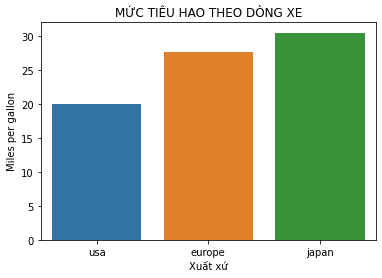

In [17]:
# Vẽ bằng seaborn
# sb.barplot(mpg_origin['origin'], mpg_origin['mpg'])
sb.barplot(x='origin', y='mpg', data=mpg_origin)
plt.xlabel('Xuất xứ')
plt.ylabel('Miles per gallon')
plt.title('MỨC TIÊU HAO THEO DÒNG XE')

## 4. VẼ HISTOGRAM TRỌNG LƯỢNG CÁC XE

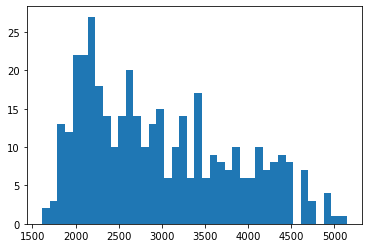

In [38]:
# Vẽ bằng matplotlib
plt.hist(df['weight'], bins=40)
plt.show()

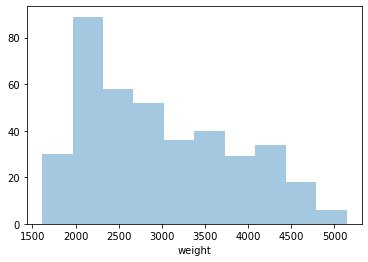

In [39]:
# Vẽ bằng seaborn
sb.distplot(df['weight'], kde=False)

## 6. VẼ BOXPLOT SO SÁNH CÔNG SUẤT CỦA CÁC DÒNG XE THẬP NIÊN 70, 80

In [42]:
congsuat_xe_7x = df.loc[(df['model_year']>=70) & (df['model_year']<80), 'horsepower']
congsuat_xe_8x = df.loc[(df['model_year']>=80) & (df['model_year']<90), 'horsepower']

In [46]:
congsuat_xe_7x.head()

0    130.0
1    165.0
2    150.0
3    150.0
4    140.0
Name: horsepower, dtype: float64

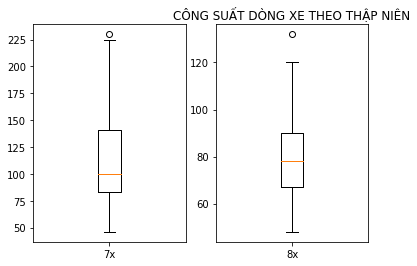

In [52]:
# Sử dụng 2 đồ thị con
plt.subplot(1, 2, 1)
plt.boxplot(congsuat_xe_7x, labels=['7x'])

plt.subplot(1, 2, 2)
plt.boxplot(congsuat_xe_8x, labels=['8x'])
plt.title('CÔNG SUẤT DÒNG XE THEO THẬP NIÊN')
plt.show()

Chú ý: trục tung của hai đồ thị con này khác nhau nên nếu dùng để so sánh thì không chính xác.
Ta thử vẽ trên cùng một đồ thị.

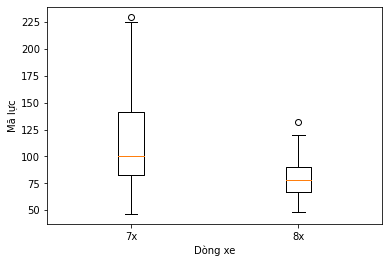

In [55]:
# Vẽ trên cùng một đồ thị
congsuat = [congsuat_xe_7x, congsuat_xe_8x]
plt.boxplot(congsuat, labels=['7x', '8x'])
plt.xlabel('Dòng xe')
plt.ylabel('Mã lực')
plt.show()

Vẽ bằng seaborn

In [81]:
congsuat_thapnien = df[['horsepower', 'model_year']]   # Không tạo ra dataframe (chỉ tạo ra đường dẫn đến df)

# congsuat_thapnien = df[['horsepower', 'model_year']].copy()    # Tạo 1 dataframe mới
congsuat_thapnien = pd.DataFrame(df[['horsepower', 'model_year']])   # Tạo 1 dataframe mới



congsuat_thapnien.head()

,horsepower,model_year
0,130.0,70
1,165.0,70
2,150.0,70
3,150.0,70
4,140.0,70


In [82]:
# Thêm 1 cột mới trên congsuat_thapnien (sẽ không sử dụng được nếu congsuat_thapnien chỉ là đường dẫn đến df)
congsuat_thapnien['thapnien'] = (congsuat_thapnien['model_year'] // 10) * 10  # // chia lấy phần nguyên
congsuat_thapnien

,horsepower,model_year,thapnien
0,130.0,70,70
1,165.0,70,70
2,150.0,70,70
3,150.0,70,70
4,140.0,70,70
...,...,...,...
393,86.0,82,80
394,52.0,82,80
395,84.0,82,80
396,79.0,82,80


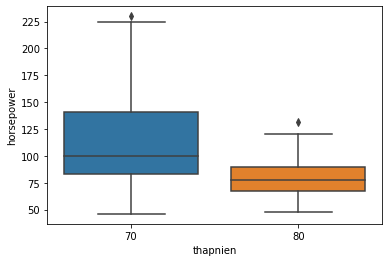

In [85]:
# Vẽ bằng seaborn
sb.boxplot(x='thapnien', y='horsepower', data=congsuat_thapnien)

## 7. KHẢO SÁT MỨC TIÊU HAO NHIÊN LIỆU

### 7.1 Với số lượng xi lanh

Thử vẽ bằng đồ thị scatter plot.

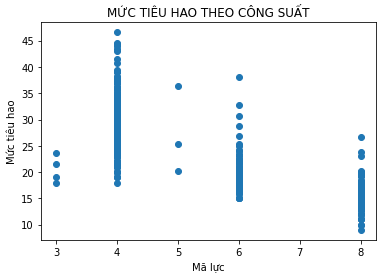

In [98]:
# Vẽ bằng matplotlib
plt.scatter(df['cylinders'], df['mpg'])
plt.xlabel('Số xi lanh')
plt.ylabel('Mức tiêu hao')
plt.title('MỨC TIÊU HAO THEO SỐ XILANH')
plt.show()

Nhận xét: cột số xylanh là thuộc tính phân loại nên đồ thị trên không thể hiện rõ công suất và số lượng các xylanh. 
Để đơn giản, ta có thể vẽ boxplot với seaborn

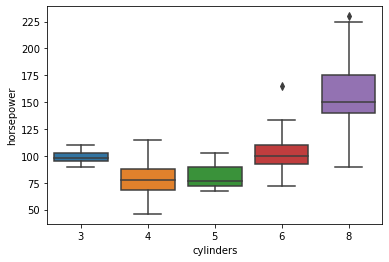

In [100]:
sb.boxplot(x='cylinders', y='horsepower', data=df)

### 7.2 Với công suất theo mã lực

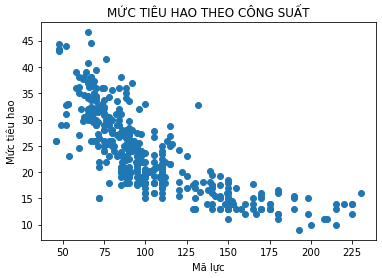

In [94]:
# Vẽ bằng matplotlib
plt.scatter(df['horsepower'], df['mpg'])
plt.xlabel('Mã lực')
plt.ylabel('Mức tiêu hao')
plt.title('MỨC TIÊU HAO THEO CÔNG SUẤT')
plt.show()

Text(0.5, 1.0, 'MỨC TIÊU HAO THEO CÔNG SUẤT')

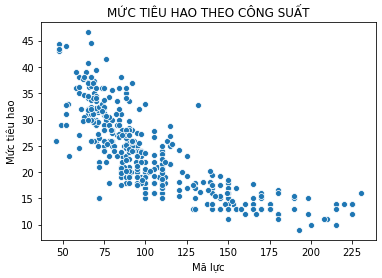

In [114]:
# Vẽ bằng seaborn
sb.scatterplot(x='horsepower', y='mpg', data=df)
plt.xlabel('Mã lực')
plt.ylabel('Mức tiêu hao')
plt.title('MỨC TIÊU HAO THEO CÔNG SUẤT')

### 7.3 Với gia tốc

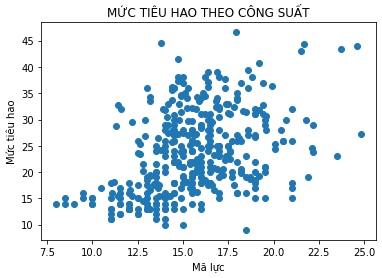

In [96]:
# Vẽ bằng matplotlib
plt.scatter(df['acceleration'], df['mpg'])
plt.xlabel('Mã lực')
plt.ylabel('Mức tiêu hao')
plt.title('MỨC TIÊU HAO THEO CÔNG SUẤT')
plt.show()

### 7.4 Với năm sản xuất

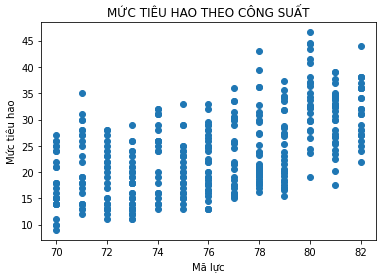

In [97]:
# Vẽ bằng matplotlib
plt.scatter(df['model_year'], df['mpg'])
plt.xlabel('Mã lực')
plt.ylabel('Mức tiêu hao')
plt.title('MỨC TIÊU HAO THEO CÔNG SUẤT')
plt.show()

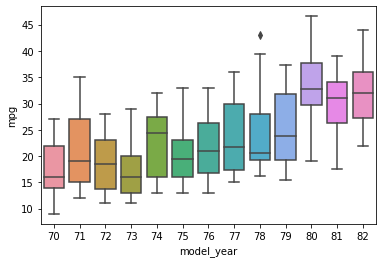

In [116]:
sb.boxplot(x='model_year', y='mpg', data=df)